Data URL:  http://datav2.promptcloud.com/data/promp_ed1f1caaff/sample/athleta_gap_com-fashion_sample.json



In [1]:
import requests
import pandas as pd

url="http://datav2.promptcloud.com/data/promp_ed1f1caaff/sample/athleta_gap_com-fashion_sample.json"

results = requests.get(url).json()
data=results['root']['page']
print(type(data)) 
print(len(data)) 
ls=[]
for i in data:
  ls.extend(i['record'])
ls

data=[]
for i in ls:
  if type(i)==dict:
    data.append(i)

df = pd.DataFrame(data)
df.head() #prints the first 5 rows



<class 'list'>
47


,uniq_id,product_name,product_code,mrp,price,pdp_url,product_imageurl,brand_name,product_category,retailer,description,product_position,rating,review_count,style_attributes,total_sizes,available_size,product_id,discount,appeared_date,color,selected_size,rating_count,color_thumbnail,out_of_stock,product_gender,seller_name
0,cc0c99de7a96cc0b12927cebfd0c549f,All Day Skort,591445,59.00,59.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/040/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""2"",""4""]",591445,0.00,30-09-2018,Light Asphalt,Regular,182,https://athleta.gap.com/webcontent/0012/446/88...,0,Women,Athleta
1,50069dd312cc211e013f5d4e9a87fa2b,All Day Skort,591445,59.00,59.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/040/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]",591445,0.00,30-09-2018,Navy,Regular,182,https://athleta.gap.com/webcontent/0012/149/14...,0,Women,Athleta
2,8e43e9dd873861e8420720a77005fb3c,All Day Skort,591445,59.00,59.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/029/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]",591445,0.00,30-09-2018,Black,Regular,182,https://athleta.gap.com/webcontent/0012/148/39...,0,Women,Athleta
3,43babf44ac23511bc99e71109eb69755,Performa Bikini,354125,16.00,16.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/612/...",Athleta,Underwears,Athleta,Mesh detailing provides amazing airflow,19,4.35,83,"[""MEDIUM RISE. Sits below the natural waist"",""...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354125,0.00,30-09-2018,Milkshake Pink,Regular,83,https://athleta.gap.com/webcontent/0015/612/21...,0,Women,Athleta
4,6d1df8d1b79b37430be3ff226bc38ae0,Performa Bikini,354125,16.00,16.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/585/...",Athleta,Underwears,Athleta,Mesh detailing provides amazing airflow,19,4.35,83,"[""MEDIUM RISE. Sits below the natural waist"",""...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354125,0.00,30-09-2018,Arbor Olive,Regular,83,https://athleta.gap.com/webcontent/0015/585/14...,0,Women,Athleta


### Variables of interest

**Predictor variables:**   
Price  
Sizes  
Sustainable (1=yes, 0=no)  
Fair Trade (1=yes, 0=no)   


**Target Variable:**  
Product Rating

In [0]:
# Adding columns to the df for Sustainable and non sustaianble:
import json

des=df['description']

# Create a column of indicator variables for sustainable items
sus=[]

for i in des:
  if i.find("SUSTAINABLE")!= -1:
    sus.append(1)
  else:
    sus.append(0)
#sus

# create a new column called "sustainable"
df['sustainable']=sus

# Create a column of indicator variables for fair trade items
fair=[]
for i in des:
  if i.find("FAIR TRADE")!= -1:
    fair.append(1)
  else:
    fair.append(0)
#fair

# create a new column called "fair trade"
df['fair trade'] = fair


# Create a column to count total sizes
sizes=[]
for i in df['total_sizes']:
  x=json.loads(i)
  sizes.append(len(x))

df['size_count']=sizes


Create Dummies in Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Pivot Tables in Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [3]:
#examine the dataframe with the indicator variables included 
df.head()

,uniq_id,product_name,product_code,mrp,price,pdp_url,product_imageurl,brand_name,product_category,retailer,description,product_position,rating,review_count,style_attributes,total_sizes,available_size,product_id,discount,appeared_date,color,selected_size,rating_count,color_thumbnail,out_of_stock,product_gender,seller_name,sustainable,fair trade,size_count
0,cc0c99de7a96cc0b12927cebfd0c549f,All Day Skort,591445,59.00,59.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/040/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""2"",""4""]",591445,0.00,30-09-2018,Light Asphalt,Regular,182,https://athleta.gap.com/webcontent/0012/446/88...,0,Women,Athleta,1,0,9
1,50069dd312cc211e013f5d4e9a87fa2b,All Day Skort,591445,59.00,59.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/040/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]",591445,0.00,30-09-2018,Navy,Regular,182,https://athleta.gap.com/webcontent/0012/149/14...,0,Women,Athleta,1,0,9
2,8e43e9dd873861e8420720a77005fb3c,All Day Skort,591445,59.00,59.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/029/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]",591445,0.00,30-09-2018,Black,Regular,182,https://athleta.gap.com/webcontent/0012/148/39...,0,Women,Athleta,1,0,9
3,43babf44ac23511bc99e71109eb69755,Performa Bikini,354125,16.00,16.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/612/...",Athleta,Underwears,Athleta,Mesh detailing provides amazing airflow,19,4.35,83,"[""MEDIUM RISE. Sits below the natural waist"",""...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354125,0.00,30-09-2018,Milkshake Pink,Regular,83,https://athleta.gap.com/webcontent/0015/612/21...,0,Women,Athleta,0,0,5
4,6d1df8d1b79b37430be3ff226bc38ae0,Performa Bikini,354125,16.00,16.00,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/585/...",Athleta,Underwears,Athleta,Mesh detailing provides amazing airflow,19,4.35,83,"[""MEDIUM RISE. Sits below the natural waist"",""...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354125,0.00,30-09-2018,Arbor Olive,Regular,83,https://athleta.gap.com/webcontent/0015/585/14...,0,Women,Athleta,0,0,5


Investigating the Variables 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


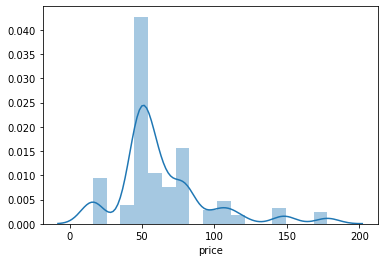

In [4]:
#Price Histogram
import seaborn as sns
sns.distplot(df['price'].astype(float))


In [0]:
#I few rating varianles are missing, I will replace them with the mean:
import numpy as np

# program to find the mean product rating
m=0
vals=[]
for i in df['rating']:
  if i!='NA':
    vals.append(float(i))
m=np.mean(vals)
m

# function to change NA's to the mean product rating
def change_na(st):
  if st=='NA':
    st=m
  return st

# try the change_na function
x='NA'
change_na(x)

# apply the change_na function to the rating column
df['rating']=df['rating'].apply(change_na)

#change the rating column data type to float
df['rating']=df['rating'].astype(float)

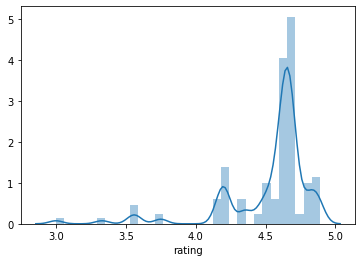

In [114]:
#Rating Histogram 
import seaborn as sns
x=df['rating']
sns.distplot(x)

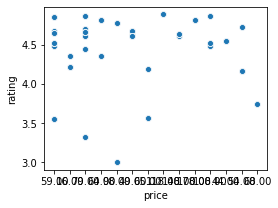

In [115]:
#Price and Rating scatterplot 
import seaborn as sns
import matplotlib.pyplot as plt

x=df['price']
y=df['rating']
plt.figure(figsize=(4, 3))
sns.scatterplot(x,y)

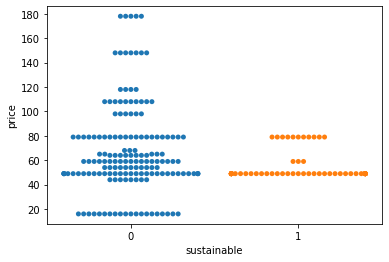

In [116]:
#Sustainable swarmplot
import seaborn as sns
x=df['sustainable']
y=df['price'].astype(float)
sns.swarmplot(x,y)

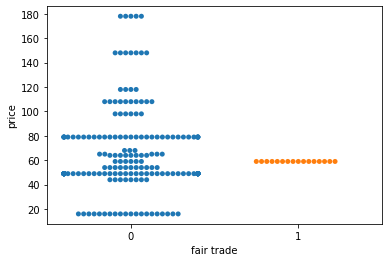

In [117]:
#Fair Trade Swarmplot
import seaborn as sns
x=df['fair trade']
y=df['price'].astype(float)
sns.swarmplot(x,y)

Statsmodels
https://www.statsmodels.org/stable/index.html

Scikit Learn
https://scikit-learn.org/


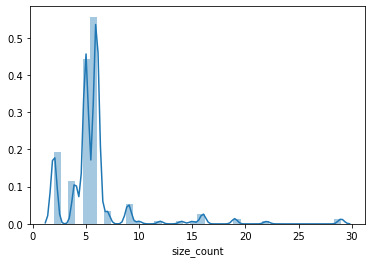

In [118]:
#Size count histogram
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
sns.distplot(df.size_count, bins=40)
#Interpretation: 
#where ["0","2","4","6","8","10","12","14","16"] count = 9
#and ["XS","S","M","L","XL"]count=5 

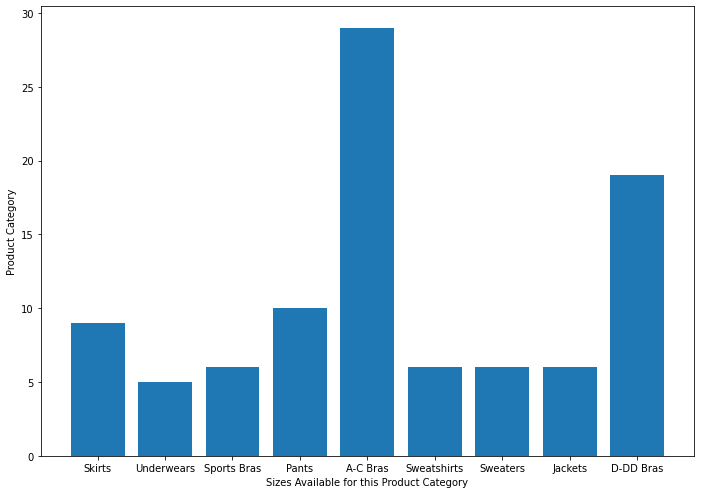

In [119]:
#Bar graph of clothing categories vs # of sizes
import pandas as pd
#import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
#?sns.set_style("whitegrid") why such weird white breaks?
plt.figure(figsize=(11.7, 8.27))
matplotlib.pyplot.bar(df.product_category, df.size_count)
plt.ylabel("Sizes Available for this Product Category")
plt.xlabel("Product Category")
plt.show()

In [120]:
#Pivot table product category & count 
#Pivot table 1
#Count # sustainable by product category
import pandas as pd
PT1=pd.pivot_table(df, values='sustainable', index=['product_category'],aggfunc=np.sum) 
#?if product_gender is replaced by "discount" does NaN mean blank value? 
print("Pivot Table 1 Sustainability By Category")
PT1

Pivot Table 1 Sustainability By Category


,sustainable
product_category,
A-C Bras,0
D-DD Bras,0
Jackets,0
Pants,11
Skirts,3
Sports Bras,0
Sweaters,0
Sweatshirts,47
Underwears,0


In [121]:
#Pivot Table 2
#Count # Fair Trade by product category
PT2=pd.pivot_table(df, values='fair trade', index=['product_category'],aggfunc=np.sum)
print("Pivot Table Fair Trade By Category:")
PT2

Pivot Table Fair Trade By Category:


,fair trade
product_category,
A-C Bras,3
D-DD Bras,0
Jackets,0
Pants,0
Skirts,0
Sports Bras,13
Sweaters,0
Sweatshirts,0
Underwears,0


In [122]:
#Pivot Table 3
# Mean by product category
df['price']=df['price'].astype(float) #change the price column data type to float
PT3=pd.pivot_table(df, index=['product_category'], values=['price'], aggfunc='mean')
print("Pivot Table 3 Mean by Product Category:")
PT3

Pivot Table 3 Mean by Product Category:


,price
product_category,
A-C Bras,58.750000
D-DD Bras,56.200000
Jackets,160.500000
Pants,79.000000
Skirts,59.500000
Sports Bras,51.448980
Sweaters,108.000000
Sweatshirts,58.823529
Underwears,16.000000


In [123]:
#Pivot Table 4
# Count by product category
PT4=pd.pivot_table(df, index=['product_category'], values=['seller_name'], aggfunc='count') 
#values could not be from product category if that's the index. 
#Does using seller_name provide the result we need?
print("Pivot Table Product count per product category")
PT4

Pivot Table Product count per product category


,seller_name
product_category,
A-C Bras,20
D-DD Bras,10
Jackets,12
Pants,14
Skirts,10
Sports Bras,49
Sweaters,18
Sweatshirts,68
Underwears,20


In [124]:
#Pivot Table 5
# Review by product category
df['review_count']=df['review_count'].astype(float)
PT5=pd.pivot_table(df, index=['product_category'], values=['review_count'], aggfunc='mean') 
print("Pivot Table 5 Review Count by Product Category:")
PT5

Pivot Table 5 Review Count by Product Category:


,review_count
product_category,
A-C Bras,292.350000
D-DD Bras,314.400000
Jackets,44.916667
Pants,823.285714
Skirts,370.200000
Sports Bras,172.163265
Sweaters,58.277778
Sweatshirts,2154.808824
Underwears,58.200000


In [125]:
##change my variables to dummies
#Variables to be changed into dummies:
#1. sustainable 
#2. fair trade
s=df['sustainable']
ft=df['fair trade']
import pandas as pd
sust_dummy=pd.get_dummies(s, prefix="sust", prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
print(sust_dummy) #where sust_0=0=not sustainable & sust_1=1=sustainable

fair_dummy=pd.get_dummies(ft, prefix="fair_trade", prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
print(fair_dummy) #where fair trade_0=0=not ft & fair trade_1=1=ft

#adding fair trade & sust. dummies to df
# I ran the following code 1 time and then turned it to a comment (#) so that it does not keep adding the dummy variables every time I run this block of code
df.head() #starting point
#add sust_dummy run once and comment it out 
#df=pd.concat([df,sust_dummy], axis=1) #axis=1 alligning the 2 "tables"
#df.head()
#add fair_dummy run once and comment it out 
#df=pd.concat([df, fair_dummy], axis=1)
df.head() #ending point with both dummies

##Method for adding dummies that didn't work: -- I understand Why it didn't work!
##? When I replace only replaces the column names and not the content??? (sust_dummy generates 2 comumns but it comes into the dataset with only 1 column)
##Replace columns sustainable and fair trade in df 
##dfnew = df.rename(columns={'sustainable': 'sust_dummy', 'fair trade':'fair_dummy'})
##dfnew

#?Should I delete the original columns with "sustainable" and "fairtrade"? or we just would not include it into the regression analysis?

     sust_0  sust_1
0         0       1
1         0       1
2         0       1
3         1       0
4         1       0
..      ...     ...
216       1       0
217       1       0
218       1       0
219       1       0
220       1       0

[221 rows x 2 columns]
     fair_trade_0  fair_trade_1
0               1             0
1               1             0
2               1             0
3               1             0
4               1             0
..            ...           ...
216             1             0
217             1             0
218             1             0
219             1             0
220             1             0

[221 rows x 2 columns]


,uniq_id,product_name,product_code,mrp,price,pdp_url,product_imageurl,brand_name,product_category,retailer,description,product_position,rating,review_count,style_attributes,total_sizes,available_size,product_id,discount,appeared_date,color,selected_size,rating_count,color_thumbnail,out_of_stock,product_gender,seller_name,sustainable,fair trade,size_count
0,cc0c99de7a96cc0b12927cebfd0c549f,All Day Skort,591445,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/040/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182.0,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""2"",""4""]",591445,0.00,30-09-2018,Light Asphalt,Regular,182,https://athleta.gap.com/webcontent/0012/446/88...,0,Women,Athleta,1,0,9
1,50069dd312cc211e013f5d4e9a87fa2b,All Day Skort,591445,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/040/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182.0,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]",591445,0.00,30-09-2018,Navy,Regular,182,https://athleta.gap.com/webcontent/0012/149/14...,0,Women,Athleta,1,0,9
2,8e43e9dd873861e8420720a77005fb3c,All Day Skort,591445,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/029/...",Athleta,Skirts,Athleta,INSPIRED FOR: adventure &lt;b&gt;To Fro&lt;/b&...,8,4.48,182.0,"[""Semi\u0026amp;#45fitted, mid\u0026amp;#45ris...","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]","[""0"",""2"",""4"",""6"",""8"",""10"",""12"",""14"",""16""]",591445,0.00,30-09-2018,Black,Regular,182,https://athleta.gap.com/webcontent/0012/148/39...,0,Women,Athleta,1,0,9
3,43babf44ac23511bc99e71109eb69755,Performa Bikini,354125,16.00,16.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/612/...",Athleta,Underwears,Athleta,Mesh detailing provides amazing airflow,19,4.35,83.0,"[""MEDIUM RISE. Sits below the natural waist"",""...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354125,0.00,30-09-2018,Milkshake Pink,Regular,83,https://athleta.gap.com/webcontent/0015/612/21...,0,Women,Athleta,0,0,5
4,6d1df8d1b79b37430be3ff226bc38ae0,Performa Bikini,354125,16.00,16.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/585/...",Athleta,Underwears,Athleta,Mesh detailing provides amazing airflow,19,4.35,83.0,"[""MEDIUM RISE. Sits below the natural waist"",""...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354125,0.00,30-09-2018,Arbor Olive,Regular,83,https://athleta.gap.com/webcontent/0015/585/14...,0,Women,Athleta,0,0,5


Multiple Linear Regression 
https://www.geeksforgeeks.org/ml-multiple-linear-regression-using-python/

Consider Logistic (break down by rating)


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [126]:
# Rating conversion to 0 and 1. 

import numpy as np 
from numpy import mean
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

mean_rating=mean(df["rating"]) 
print(mean_rating) #4.528
#max_rating=max(df["rating"])
#print(max_rating) #4.89 

# Break Down rating into >mean & <mean
rating_dummy=[]

for i in df["rating"]:
  if i<mean_rating: 
    rating_dummy.append(0) #low raing 
  if i>=mean_rating:
    rating_dummy.append(1) #high rating

print(rating_dummy)

#Add rating dummy to the df data frame
# a. Make the list into a series
#column_values = pd.Series(rating_dummy)
# b. Add a new column at location 0 
#df.insert(loc=0, column='rating_dummy', value=column_values)
df.tail(10)

4.528194444444432
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]


,uniq_id,product_name,product_code,mrp,price,pdp_url,product_imageurl,brand_name,product_category,retailer,description,product_position,rating,review_count,style_attributes,total_sizes,available_size,product_id,discount,appeared_date,color,selected_size,rating_count,color_thumbnail,out_of_stock,product_gender,seller_name,sustainable,fair trade,size_count
211,a2b9c1b5d08c77fc9dae2ba5ca688324,Vinyasa Bra,353997,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/604/...",Athleta,Sports Bras,Athleta,FAIR TRADE: Made in a Fair Trade Certified&amp...,21,4.850000,13.0,"[""Designed for: A\u0026amp;#45C cups and MEDIU...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",353997,0.00,30-09-2018,Black,Regular,13,https://athleta.gap.com/webcontent/0015/604/31...,0,Women,Athleta,0,1,5
212,e68d9223a76a4fb2d5aefccbe354e4e4,Panache Non Wired Sports Bra,627552,68.00,68.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0014/223/...",Athleta,A-C Bras,Athleta,"INSPIRED FOR: run, gym/training, workout &lt;b...",83,3.750000,53.0,"[""HIGH SUPPORT C \u0026amp;#45 G"",""WIRELESS SU...","[""32C"",""32D"",""32DD"",""34C"",""34D"",""34DD"",""36C"",""...","[""32C"",""32D"",""32DD"",""34C"",""34D"",""34DD"",""36C"",""...",627552,0.00,30-09-2018,Black,Regular,53,https://athleta.gap.com/webcontent/0014/223/96...,0,Women,Athleta,0,0,22
213,6a7afda4d25b0d9a2c46ff932d872684,Panache Non Wired Sports Bra,627552,68.00,68.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0016/053/...",Athleta,A-C Bras,Athleta,"INSPIRED FOR: run, gym/training, workout &lt;b...",83,3.750000,53.0,"[""HIGH SUPPORT C \u0026amp;#45 G"",""WIRELESS SU...","[""32C"",""32D"",""32DD"",""34C"",""34D"",""34DD"",""36C"",""...","[""32C"",""32D"",""32DD"",""34C"",""34D"",""34DD"",""36C"",""...",627552,0.00,30-09-2018,Ballerina Gown,Regular,53,https://athleta.gap.com/webcontent/0015/697/13...,0,Women,Athleta,0,0,12
214,323e32fe3da6cb02738263e22ca3b648,Panache Non Wired Sports Bra,627552,68.00,68.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0014/422/...",Athleta,A-C Bras,Athleta,"INSPIRED FOR: run, gym/training, workout &lt;b...",83,3.750000,53.0,"[""HIGH SUPPORT C \u0026amp;#45 G"",""WIRELESS SU...","[""32C"",""32D"",""32DD"",""34C"",""34D"",""34DD"",""36C"",""...","[""32C"",""32D"",""32DD"",""34C"",""34D"",""34DD"",""36C"",""...",627552,0.00,30-09-2018,Nude,Regular,53,https://athleta.gap.com/webcontent/0014/445/98...,0,Women,Athleta,0,0,14
215,f276f3380c35e6c631286bb0db244118,Empower Daily Bra,354117,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0015/686/...",Athleta,Sports Bras,Athleta,Fully removable cups Easy pocket for use of ou...,80,4.528194,0.0,"[""Designed for: A\u0026amp;#45C cups and MEDIU...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354117,0.00,30-09-2018,Black,Regular,0,https://athleta.gap.com/webcontent/0015/686/16...,0,Women,Athleta,0,0,5
216,5156b17a02b4daf26ec6491e1d7f1cbb,Empower Daily Bra,354117,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0016/035/...",Athleta,Sports Bras,Athleta,Fully removable cups Easy pocket for use of ou...,80,4.528194,0.0,"[""Designed for: A\u0026amp;#45C cups and MEDIU...","[""XS"",""S"",""M"",""L"",""XL""]","[""XS"",""S"",""M"",""L"",""XL""]",354117,0.00,30-09-2018,Milkshake Pink,Regular,0,https://athleta.gap.com/webcontent/0015/686/10...,0,Women,Athleta,0,0,5
217,e06238978869496a78e67ca62bf47692,Empower Daily Bra,354117,59.00,59.0,https://athleta.gap.com/browse/product.do?cid=...,"[""https://athleta.gap.com/webcontent/0016/035/...",Athleta,Sports Bras,Athleta,Fully removable cups Easy pocket for use of ou...,80,4.528194,0.0,"[""Designed for: A\u0026amp;#45C cups and MEDIU...","[""XS"",""S"",""M"",""L"",""XL""]","[""

In [127]:
# Classification regression 
import numpy as np
from sklearn.linear_model import LogisticRegression 
# LogisticRegression: I don't end up using this, when I did logreg = LogisticRegression() 
#I got the same results when I tryed to use logreg.fit(X_train, y_train)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Predict variable (desired target): y=rating_dummy either 0 or 1
y=np.array(df["rating_dummy"]) #.reshape(-1,1)
print(y[:5])
type(y)
# Dependent variables: x1= sust_dummy
                      #x2= fair_dummy
                      #x3= price
                      #x4= size_count 
X=df[['size_count', 'price', 'fair_trade_0', 'sust_0']].to_numpy() 
X=np.round(X)
X=X.astype(int)
print(X[:5])
type(X)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y) #25% and 75% is default

#Classification 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7) #n_neighbors = 7 provides accuracy of 0.87
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_test)

train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print("Training accuracy (7 neighbors):", train_accuracy)
print("Test accuracy (7 neighbors):", test_accuracy)


KeyError: ignored

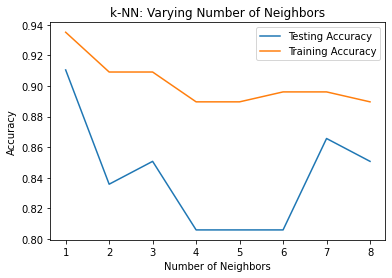

In [0]:
#Play with the amount of neighbors:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#Plots
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Training accuracy (3 neighbors): 0.9393939393939394
Test accuracy (3 neighbors): 0.8928571428571429


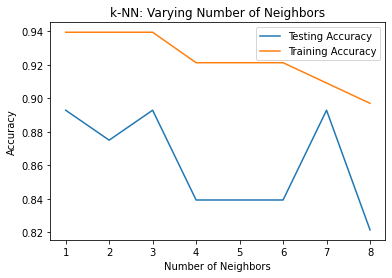

In [0]:
#What if the training is set to 25% as default?
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21, stratify=y)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) #n_neighbors = 7, test size=0.3 provided test accuracy of 0.87
knn.fit(X_train, y_train) #don't know if it worked right...
y_pred=knn.predict(X_test)

train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print("Training accuracy (3 neighbors):", train_accuracy)
print("Test accuracy (3 neighbors):", test_accuracy)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [0]:
#Select the best # of neighbors best on the plot:

#With 1 neighbor:
knn=KNeighborsClassifier(n_neighbors=1) #n_neighbors = 7 provides accuracy of 0.87
knn.fit(X_train, y_train) 
y_pred=knn.predict(X_test)

train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print("Training accuracy (1 neighbor):", train_accuracy)
print("Test accuracy (1 neighbor):", test_accuracy)

#With 3 neighbors:
knn=KNeighborsClassifier(n_neighbors=3) #n_neighbors = 7 provides accuracy of 0.87
r=knn.fit(X_train, y_train) 
pred=knn.predict(X_test)

train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print("Training accuracy (3 neighbors):", train_accuracy)
print("Test accuracy (3 neighbors):", test_accuracy)

Training accuracy (1 neighbor): 0.9393939393939394
Test accuracy (1 neighbor): 0.8928571428571429
Training accuracy (3 neighbors): 0.9393939393939394
Test accuracy (3 neighbors): 0.8928571428571429


In [0]:
#Intercept, Coefficients, and p-values
from statsmodels.api import OLS
import statsmodels.api as sm
results = sm.OLS(y,X).fit()
print(results.summary())
#'size_count'=x1
#'price'=x2 
#'fair_trade_0'=x3 
#'sust_0'=x4 NOT SIGNIFICANT

#confusion matrix:
print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Comparison Parameters
print("Comparison Parameters: (which # of neighbors are we using?)")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              156.2
Date:                Fri, 24 Apr 2020   Prob (F-statistic):                    1.08e-62
Time:                        14:04:43   Log-Likelihood:                         -130.15
No. Observations:                 221   AIC:                                      268.3
Df Residuals:                     217   BIC:                                      281.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

So if Sustainable is not significant, let's run the classification again with 3 variables. 




In [0]:
V3=df[['size_count','price', 'fair_trade_0']].to_numpy()
V3=np.round(V3)
V3=V3.astype(int)
print(V3[:5])
type(V3)

#Split data

V3_train, V3_test, y_train, y_test = train_test_split(V3,y, test_size=0.25, random_state=21, stratify=y)

#Classification 

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7) 
knn.fit(V3_train, y_train) 
y_pred=knn.predict(V3_test)

train_accuracy= knn.score(V3_train, y_train)
test_accuracy=knn.score(V3_test, y_test)
print("Training accuracy:", train_accuracy) # was 0.896
print("Test accuracy:", test_accuracy) #was 0.865

#Play with the amount of neighbors:
#Setup arrays to store train and test accuracies

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    
    knn.fit(V3_train, y_train)
    
    #Compute accuracy on the training set
    
    train_accuracy[i] = knn.score(V3_train, y_train)

    #Compute accuracy on the testing set
    
    test_accuracy[i] = knn.score(V3_test, y_test)

#Intercept, Coefficients, and p-values
from statsmodels.api import OLS
import statsmodels.api as sm
results = sm.OLS(y,V3).fit()
print(results.summary())
#Where 
#???'size_count'=x1 -- became insig....
#'price'=x2 
#???'fair_trade'=x3-- became insig....
print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Result: When I excluded the sustainablitity parameter,") 
print("     the accuracy of the model remained the same, so sustainability variable is not significant.")


[[ 9 59  1]
 [ 9 59  1]
 [ 9 59  1]
 [ 5 16  1]
 [ 5 16  1]]
Training accuracy: 0.9090909090909091
Test accuracy: 0.8928571428571429
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.735
Method:                 Least Squares   F-statistic:                              205.8
Date:                Fri, 24 Apr 2020   Prob (F-statistic):                    2.54e-63
Time:                        14:15:00   Log-Likelihood:                         -131.48
No. Observations:                 221   AIC:                                      269.0
Df Residuals:                     218   BIC:                                      279.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                      

Can I increase the model performance by splitting the rating differently?


#Coefficients meaning
#x1 =size count 
#x2 =price 
#x3 =Fair trade_0
#More sizes coause lower rating (maybe bras is the problem)
#The higher the proce the higher the rating 
#If a garmnet if not Fair Trade it will have higher rating than Fair Trade.



     rating_dummy_1  rating_dummy  ... fair_trade_0 fair_trade_1
211               1             1  ...            0            1
212               0             0  ...            1            0
213               0             0  ...            1            0
214               0             0  ...            1            0
215               1             1  ...            1            0
216               1             1  ...            1            0
217               1             1  ...            1            0
218               1             1  ...            1            0
219               1             1  ...            1            0
220               1             1  ...            1            0

[10 rows x 36 columns]
[0 0 0 0 0]
[[ 9 59  1  0]
 [ 9 59  1  0]
 [ 9 59  1  0]
 [ 5 16  1  1]
 [ 5 16  1  1]]
Training accuracy: 0.9090909090909091
Test accuracy: 0.8928571428571429


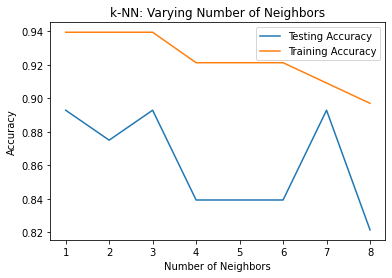

Confusion Matrix:
[[12  3]
 [ 3 38]]
Comparison Parameters: (which # of neighbors are we using?)
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.93      0.93      0.93        41

    accuracy                           0.89        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.89      0.89      0.89        56

Conclusion: Both of these classificaions have the same result.
            Training on 25% instead of 30% of the data set has a positive impact on the model performance.


In [0]:
#Split based on rating by 2.5:
for i in df["rating"]:
  if i<2.5: 
    rating_dummy.append(0)
  if i>=2.5:
    rating_dummy.append(1)

#print(rating_dummy)
 
#Add rating dummy to the df data frame
# a. Make the list into a series
column_values = pd.Series(rating_dummy)
# b. Add a new column at location 0 
#df.insert(loc=0, column='rating_dummy_1', value=column_values)
print(df.tail(10))

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Predict variable (desired target): y=rating_dummy either 0 or 1
y=np.array(df["rating_dummy_1"])
print(y[:5])
type(y)

X1=df[['size_count', 'price', 'fair_trade_0', 'sust_0']].to_numpy()
X1=np.round(X1)
X1=X1.astype(int)
print(X1[:5])
type(X1)

#Split data
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, test_size=0.25, random_state=21, stratify=y) #25% and 75% is default

#Classification 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7) #n_neighbors = 7 provides accuracy of 0.87
knn.fit(X1_train, y_train)
y_pred=knn.predict(X1_test)

train_accuracy= knn.score(X1_train, y_train)
test_accuracy=knn.score(X1_test, y_test)
print("Training accuracy:", train_accuracy) #0.896
print("Test accuracy:", test_accuracy) #0.865

#Play with the amount of neighbors:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X1_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X1_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X1_test, y_test)

#Plots
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#Intercept, Coefficients, and p-values
#Where 
#'size_count'=x1
#'price'=x2 
#'sust_0'=x3
print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print("Comparison Parameters: (which # of neighbors are we using?)")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Conclusion: Both of these classificaions have the same result.") 
print("            Training on 25% instead of 30% of the data set has a positive impact on the model performance.")

In [0]:
#!pip install XlsxWriter
#!pip install openpyxl
import xlsxwriter
import pandas as pd


writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer)
writer.save()